In [22]:
!pip install requests matplotlib pandas


In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Your Spoonacular API key
API_KEY = "26195fcda62743798857b372034fef61"
BASE_URL = "https://api.spoonacular.com"


In [23]:
# Function: Search recipe and return valid ID
def search_recipe(query="chicken soup"):
    url = f"{BASE_URL}/recipes/complexSearch"
    params = {
        "query": query,
        "number": 1,
        "addRecipeInformation": True,  # Needed to get usable ID
        "apiKey": API_KEY
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        print("Search Error:", response.status_code)
        print(response.text)
        return None, None
    data = response.json()
    if data["results"]:
        recipe = data["results"][0]
        return recipe["id"], recipe["title"]
    else:
        return None, None

# Function: Get full nutrition + recipe details
def get_full_nutrition(recipe_id):
    url = f"{BASE_URL}/recipes/{recipe_id}/information"
    params = {
        "apiKey": API_KEY,
        "includeNutrition": True
    }
    response = requests.get(url, params=params)

    if response.status_code != 200:
        print("Error fetching data!")
        print("Status Code:", response.status_code)
        print("Response Text:", response.text)
        return {}

    try:
        return response.json()
    except Exception as e:
        print("JSON decode error:", e)
        return {}

# Function: Extract only useful nutrient values
def extract_relevant_nutrients(nutrition_json):
    target_nutrients = [
        "Calories", "Carbohydrates", "Protein", "Fat", "Sugar", "Fiber",
        "Sodium", "Cholesterol", "Saturated Fat"
    ]
    nutrients = nutrition_json.get("nutrition", {}).get("nutrients", [])
    extracted = {}
    for nutrient in nutrients:
        name = nutrient["name"]
        if name in target_nutrients:
            extracted[name] = f"{nutrient['amount']} {nutrient['unit']}"
    return extracted

# Function: Extract ingredients, instructions, metadata
def extract_recipe_details(recipe_json):
    print("\n Recipe Name:", recipe_json.get("title"))
    print(" Image URL:", recipe_json.get("image"))
    print(" Ready in:", recipe_json.get("readyInMinutes"), "minutes")
    print(" Servings:", recipe_json.get("servings"))

    # Ingredients
    print("\n Ingredients:")
    for ing in recipe_json.get("extendedIngredients", []):
        print(f" - {ing['original']}")

    # Instructions
    print("\n Instructions:")
    instructions = recipe_json.get("analyzedInstructions", [])
    if instructions:
        for step in instructions[0]["steps"]:
            print(f" Step {step['number']}: {step['step']}")
    else:
        print(" No step-by-step instructions available.")

# Run end-to-end for any food
query = "grilled salmon"  # Try also: "oatmeal", "tofu salad", "chicken biryani"
recipe_id, recipe_name = search_recipe(query)

if recipe_id:
    data = get_full_nutrition(recipe_id)

    # Nutrients
    nutrients = extract_relevant_nutrients(data)
    print(f"\n Nutritional Breakdown for {recipe_name}:\n")
    for k, v in nutrients.items():
        print(f"{k}: {v}")

    # Recipe details
    extract_recipe_details(data)

else:
    print("Recipe not found.")


 Nutritional Breakdown for Grilled Salmon With Mango Salsa:

Calories: 727.03 kcal
Fat: 14.46 g
Saturated Fat: 2.24 g
Carbohydrates: 96.08 g
Sugar: 67.23 g
Cholesterol: 124.74 mg
Sodium: 295.45 mg
Protein: 51.75 g
Fiber: 7.17 g

 Recipe Name: Grilled Salmon With Mango Salsa
 Image URL: https://img.spoonacular.com/recipes/645863-556x370.jpg
 Ready in: 45 minutes
 Servings: 4

 Ingredients:
 - 1/4 cup chopped cilantro
 - 2 cups finely-diced ripe mango
 - juice of half a lime
 - 1/4 cup finely-chopped red onion
 - 1 cup finely-chopped fresh pineapple
 - 2 pounds skin-on salmon fillet cut in 4 pieces
 - Salt

 Instructions:
 Step 1: To make salsa: In bowl, combine mango, pineapple, onion, cilantro and lime juice. Season to taste with salt. Set aside 20 minute to 1 hour, to blend.
 Step 2: Heat grill to medium-high. Season salmon with salt and pepper.
 Step 3: Place fish on hot grill, skin-side down, and cook 5 minutes. Do not worry if skin is blackened. Turn and grill fish until it is no 

In [24]:
import matplotlib.pyplot as plt

def visualize_nutrients(nutrients_dict, title="Nutritional Breakdown"):
    # Clean and prepare data
    labels = list(nutrients_dict.keys())
    values = [float(v.split()[0]) for v in nutrients_dict.values()]  # Get just the number part

    # Create bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color='skyblue')
    plt.title(title)
    plt.ylabel("Amount")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on top of bars
    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{val}",
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()



 Nutritional Breakdown for Grilled Salmon With Mango Salsa:

Calories: 727.03 kcal
Fat: 14.46 g
Saturated Fat: 2.24 g
Carbohydrates: 96.08 g
Sugar: 67.23 g
Cholesterol: 124.74 mg
Sodium: 295.45 mg
Protein: 51.75 g
Fiber: 7.17 g


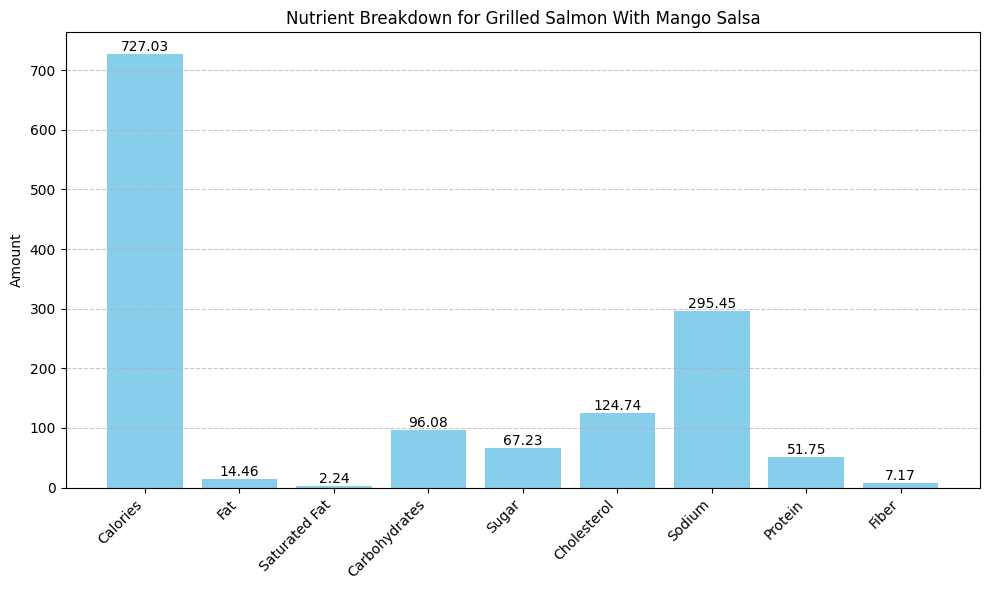

In [25]:
# Nutrients
nutrients = extract_relevant_nutrients(data)
print(f"\n Nutritional Breakdown for {recipe_name}:\n")
for k, v in nutrients.items():
    print(f"{k}: {v}")

# Visualize
visualize_nutrients(nutrients, title=f"Nutrient Breakdown for {recipe_name}")
